IndexError: index 0 is out of bounds for axis 0 with size 0

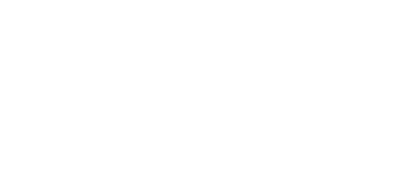

In [ ]:
import re
import pytesseract
from PIL import Image
from fpdf import FPDF
import pandas as pd
import matplotlib.pyplot as plt
import io
import os
import tempfile
import pytesseract
from PIL import Image
import re
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter



# Function to generate the table as an image in memory and return a file path
def generate_table_image(csv_file):
    data = pd.read_csv(csv_file)
    fig, ax = plt.subplots(figsize=(5, 2))  # Adjust the figsize for the desired table size
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center', loc='center')
    img_data = io.BytesIO()
    plt.savefig(img_data, format='png', bbox_inches='tight', dpi=300)
    plt.close()
    img_data.seek(0)
    img = Image.open(img_data) 
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    img.save(temp_file, format='PNG')  
    temp_file.close()  
    return temp_file.name  

# Function to add PNG images to the PDF
def add_image_to_pdf(pdf, image_path, x, y, w, h):
    pdf.image(image_path, x=x, y=y, w=w, h=h)

# Initialize a PDF object
pdf = FPDF()

# List of dates to process
dates = ['2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', 
         '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
         '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
         '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
         '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
         '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11',
         '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18',
         '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
         '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
         '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
         '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
         '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
         '2024-11-25', '2024-11-26', '2024-11-27',
         ]

# Define constants for layout
row_height = 50  
rows_per_page = 5  
row_counter = 0
y_position = 10

# Variables to store accumulated data
total_earnings = 5492.87
total_trades = 328
total_high = 7191.98
total_low = -1438.82
entry_count = 56  # To track how many entries are processed for averaging


# Calculate averages
average_earnings = total_earnings / entry_count if entry_count > 0 else 0
average_high = total_high / entry_count if entry_count > 0 else 0
average_low = total_low / entry_count if entry_count > 0 else 0
average_trades = total_trades / entry_count if entry_count > 0 else 0

# Add summary at the top of the PDF

pdf.add_page()
pdf.set_xy(10, 10)
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Summary:", 0, 1)
pdf.set_font("Arial", "", 10)
pdf.cell(0, 10, f"Total Earnings: {total_earnings:.2f}", 0, 1)
pdf.cell(0, 10, f"Total Trades: {total_trades}", 0, 1)
pdf.cell(0, 10, f"Average Trades: {average_trades}", 0, 1)
pdf.cell(0, 10, f"Average Earnings: {average_earnings:.2f}", 0, 1)
pdf.cell(0, 10, f"Average High: {average_high:.2f}", 0, 1)
pdf.cell(0, 10, f"Average Low: {average_low:.2f}", 0, 1)

# Now continue with the rest of the content
for date in dates:
    if row_counter % rows_per_page == 0:
        pdf.add_page()
        y_position = 10

    x_image1 = 10    
    x_table = 80     
    x_image2 = 150   

    image_width = 60  
    image_height = 40 

    # Add the first PNG image from PRR_Tk
    image1_path = f'PRR_Tk/Output_{date}.png'
    if os.path.exists(image1_path):
        add_image_to_pdf(pdf, image1_path, x=x_image1, y=y_position, w=image_width, h=image_height)
    else:
        print(f"Image file {image1_path} not found")
    
    csv_file = f'PRR/Data_{date}.csv'
    if os.path.exists(csv_file):
        table_img_path = generate_table_image(csv_file)
        add_image_to_pdf(pdf, table_img_path, x=x_table, y=y_position, w=image_width, h=image_height)
        os.remove(table_img_path) 
    else:
        print(f"CSV file {csv_file} not found")
    
    image2_path = f'PRR_Graphs/Graph_{date}.png'
    if os.path.exists(image2_path):
        add_image_to_pdf(pdf, image2_path, x=x_image2, y=y_position, w=image_width, h=image_height)
    else:
        print(f"Image file {image2_path} not found")

    y_position += row_height
    row_counter += 1

# Save the PDF file
pdf.output('output5.pdf')


In [31]:
def minimum(sample):
    """Return min of a sample."""
    N = len(sample)
    sample_min = sample[0]
    for x in range(N):
        if sample_min > sample[x]:
            sample_min = sample[x]
    
    return sample_min

print(minimum([7,4,2,10,1,0.2,80]))

0.2


In [37]:
# Make sure a <= b, if not just swap them around
a, b = 4, 5
if a > b:
    new_a = b
    b = a
    a = new_a


print(a)
print(b)

4
5


In [87]:
exacts = [1,2,3]
approx = [1-0.0001,2,3]


for k in range(len(exacts)):
    test_eq = exacts[k] - approx[k]
    if abs(exacts[k] - approx[k]) < 0.001:
        #print(f"exact {exacts[k]}")
        #print(f"approx {approx[k]}")
        print(test_eq)
        print(f"Test case {k}: pass")
    else:
        print(f"Test case {k}: fail")

9.999999999998899e-05
Test case 0: pass
0
Test case 1: pass
0
Test case 2: pass


In [68]:
exacts = [1,2,3]
approx = [1.01,2,3]
for k in range(len(exacts)):
    if exacts[k] - approx[k] < 0.001:
        print(f"Test case {k}: pass")
    else:
        print(f"Test case {k}: fail")

Test case 0: pass
Test case 1: pass
Test case 2: pass


In [82]:
def line_bestfit_params(xlist, ylist):
    """Return slope and intercept of best-fit line given x,y data.

    Parameters
    ----------
    xlist : list of numbers
      x-coordinates of all data points
    ylist : list of numbers
      y-coordinates of all data points

    Returns
    -------
    params: two-element tuple
      params[0] is the slope and params[1] is the intercept of the best-fit
      line.
    """
    n = len(xlist)
    Sx = sum(xlist) # FINISH THIS FUNCTION CALL
    Sy = sum(ylist) # FINISH THIS FUNCTION CALL
    Sxx = sum([x**2 for x in xlist])
    Sxy = sum(xlist[i] * ylist[i] for i in range(n))

    m = (n*Sxy - Sx*Sy)/(n*Sxx - Sx**2)
    b = (Sxx*Sy - Sx*Sxy)/(n*Sxx - Sx**2)
    return (m, b)

print(line_bestfit_params([6.1,7.6,8.7,10.4],[0,2,4,6]))

(1.419878296146044, -8.643002028397545)
